<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/Riya/Riya_DM_CP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Source:** The data is collected from analogue and digital sensors installed on the APU(Air Processing Unit) of a metro train's compressor. These sensors monitor different aspects of the compressor's operation.

**Data Type:** The dataset contains multivariate time series data, which means that readings are taken over time intervals, and multiple variables are recorded simultaneously.

**Sensors:** The dataset includes readings from the following sensors:

- **Pressure Sensor:**Monitors pressure levels within the APU.
- **Temperature Sensor:** Measures the temperature of the APU.
- **Motor Current Sensor:** Records the electrical current consumed by the compressor's motor.
- **Air Intake Valve Sensor:** Monitors the status or position of the air intake valve.

**Predictive Maintenance:** By analyzing the patterns and trends in sensor readings over time, it's possible to identify potential anomalies, degradation, or malfunctions in the compressor's APU. This information can help predict when maintenance or repairs might be needed, thereby optimizing maintenance schedules and preventing unexpected breakdowns.

**What is APU?**\
-- An APU, or Air Processing Unit, in the context of a metro train's compressor, refers to a component that plays a crucial role in providing clean and conditioned air for various systems within the train. The APU is responsible for filtering, cooling, and sometimes heating the air before it is distributed to different parts of the train, ensuring a comfortable and safe environment for passengers and crew.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

In [104]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [105]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [39]:
df.shape

(1516948, 17)

In [40]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

**Description of Attributes:**\
Attributes in the dataset:
1. **Unnamed: 0:** An unnamed index or identifier for each record in the dataset.
2. **timestamp:** The timestamp indicating the time at which the readings were recorded.
3. **TP2:** Reading from the Pressure sensor, TP2 measures the pressure on the compressor.
4. **TP3:** Reading from the Pressure sensor, TP3 measure the pressure generated at the pneumatic panel.
5. **H1:** Reading from the Pressure sensor, H1 measure the pressure generated due to pressure drop when the discharge of the cyclonic
separator filter occurs.
6. **DV_pressure:** Reading from the Pressure sensor, which measure the pressure drop generated when the towers discharge air dryers; a zero
reading indicates that the compressor is operating under load.
7. **Reservoirs:** Reading related to reservoirs which has the measure of the downstream pressure of the reservoirs, which should be close to the
pneumatic panel pressure (TP3).
8. **Oil_temperature:** Reading of oil temperature on the compressor.
9. **Motor_current:** Reading of motor current which has the measure of the current of one phase of the three-phase motor;\
it presents values close to
  - 0A - when it turns off,
  - 4A - when working offloaded,
  - 7A - when working under load and
  - 9A - when it starts working.
10. **COMP:** Reading related to the electrical signal of the air intake valve on the compressor.
  - it is active when there is no air intake,
indicating that the compressor is either turned off or operating in an offloaded state.
11. **DV_eletric:** Reading related to electrical signal that controls the compressor outlet valve.
  - it is active when the compressor is functioning under load
  - inactive when the compressor is either off or operating in an offloaded state.
12. **Towers:** Reading related to the electrical signal that defines the tower responsible for drying the air and the tower responsible
for draining the humidity removed from the air.
  - when not active, it indicates that tower one is functioning
  - when active, it indicates that tower two is in operation.
13. **MPG:** Reading related to MPG (miles per gallon).\
It measures the electrical signal responsible for starting the compressor under load by activating the intake valve
when the pressure in the air production unit (APU) falls below 8.2 bar;\
It activates the COMP sensor, which assumes
the same behaviour as the MPG sensor.
14. **LPS:** Reading of LPS (low pressure system) which measures the electrical signal that detects and activates when the pressure drops below 7 bars.
15. **Pressure_switch:** Reading from the pressure switch which measures the electrical signal that detects the discharge in the air-drying towers.
16. **Oil_level:** It measures the electrical signal that detects the oil level on the compressor\
It is active when the oil is below the
expected values.
17. **Caudal_impulses:** the electrical signal that counts the pulse outputs generated by the absolute amount of air
flowing from the APU to the reservoirs.




Basic Analysis Steps:

1. **Loading Data:** Load the dataset into a Pandas DataFrame.
2. **Data Exploration:** Explore the first few rows of the dataset using `head()` to understand its structure.
3. **Summary Statistics:** Use `describe()` to get summary statistics for numeric attributes.
4. **Data Types:** Use `info()` to see the data types of attributes and check for missing values.
5. **Data Distribution:** Plot histograms or box plots for numeric attributes to understand their distributions.
6. **Time Series Analysis:** Convert the 'timestamp' column to a datetime data type and explore temporal patterns.


In [108]:
df.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,7.584735e+06,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,4.379053e+06,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,0.000000e+00,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.792368e+06,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,7.584735e+06,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.137710e+07,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.516947e+07,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [42]:
# Checking null values
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**No Null Values are present in the dataset.**

In [43]:
#Checking duplicate rows
df.duplicated().sum()

0

**No Duplicate Instances are present.**

In [44]:
# Identifing numerical and categorical columns
df.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

In [45]:
# getting unique values for each column
num_col = df.iloc[:,2:17]
col = num_col.columns
for i in col:
  val = sorted(df[i].unique())
  cnt = len(val)
  # print(f'{i}: {val}')
  print(f'{i}: {cnt}')

TP2: 5257
TP3: 3683
H1: 2665
DV_pressure: 2257
Reservoirs: 3682
Oil_temperature: 2462
Motor_current: 1809
COMP: 2
DV_eletric: 2
Towers: 2
MPG: 2
LPS: 2
Pressure_switch: 2
Oil_level: 2
Caudal_impulses: 2


In [46]:
import pandas as pd
import statsmodels.api as sm

target_column = 'Motor_current'
y = df[target_column]

feature_columns = ['TP2', 'TP3', 'H1', 'Reservoirs', 'Oil_temperature', 'DV_pressure', 'COMP',
                   'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = df[feature_columns]

# Add a constant term to the predictor matrix (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Motor_current   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                 3.440e+05
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:51:59   Log-Likelihood:            -2.3334e+06
No. Observations:             1516948   AIC:                         4.667e+06
Df Residuals:                 1516933   BIC:                         4.667e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -14.2263      0.019   -7

In [47]:
import pandas as pd
import statsmodels.api as sm

target_column = 'Oil_temperature'
y = df[target_column]

feature_columns = ['TP2', 'TP3', 'H1', 'Reservoirs', 'Motor_current', 'DV_pressure', 'COMP',
                   'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = df[feature_columns]

# Add a constant term to the predictor matrix (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Oil_temperature   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 8.764e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:52:01   Log-Likelihood:            -4.5461e+06
No. Observations:             1516948   AIC:                         9.092e+06
Df Residuals:                 1516933   BIC:                         9.092e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              34.0774      0.090    3

In [48]:

target_column = 'DV_pressure'
y = df[target_column]

feature_columns = ['TP2', 'TP3', 'H1', 'Reservoirs', 'Motor_current', 'Oil_temperature', 'COMP',
                   'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
X = df[feature_columns]

# Add a constant term to the predictor matrix (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            DV_pressure   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                 7.341e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:52:04   Log-Likelihood:            -3.0187e+05
No. Observations:             1516948   AIC:                         6.038e+05
Df Residuals:                 1516933   BIC:                         6.039e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2146      0.006     

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1516948.0,7.584735e+06,4.379053e+06,0.000,3792367.500,7584735.000,1.137710e+07,1.516947e+07
TP2,1516948.0,1.367826e+00,3.250930e+00,-0.032,-0.014,-0.012,-1.000000e-02,1.067600e+01
TP3,1516948.0,8.984611e+00,6.390951e-01,0.730,8.492,8.960,9.492000e+00,1.030200e+01
H1,1516948.0,7.568155e+00,3.333200e+00,-0.036,8.254,8.784,9.374000e+00,1.028800e+01
DV_pressure,1516948.0,5.595619e-02,3.824015e-01,-0.032,-0.022,-0.020,-1.800000e-02,9.844000e+00
Reservoirs,1516948.0,8.985233e+00,6.383070e-01,0.712,8.494,8.960,9.492000e+00,1.030000e+01
Oil_temperature,1516948.0,6.264418e+01,6.516261e+00,15.400,57.775,62.700,6.725000e+01,8.905000e+01
Motor_current,1516948.0,2.050171e+00,2.302053e+00,0.020,0.040,0.045,3.807500e+00,9.295000e+00
COMP,1516948.0,8.369568e-01,3.694052e-01,0.000,1.000,1.000,1.000000e+00,1.000000e+00
DV_eletric,1516948.0,1.606106e-01,3.671716e-01,0.000,0.000,0.000,0.000000e+00,1.000000e+00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot = True);

In [ ]:
df.hist(figsize = (25,20),color = 'orchid');

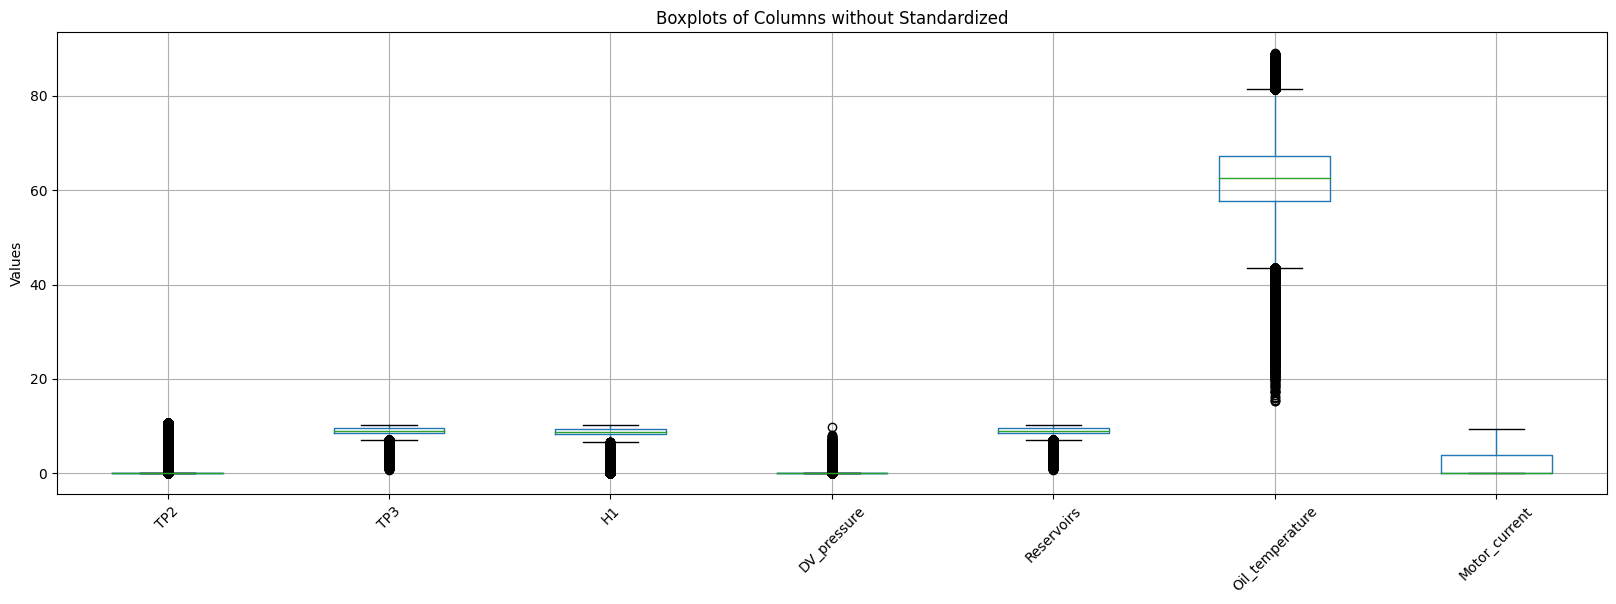

In [107]:
num_df = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

plt.figure(figsize=(20, 6))
df[num_df].boxplot()
plt.title('Boxplots of Columns without Standardized')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

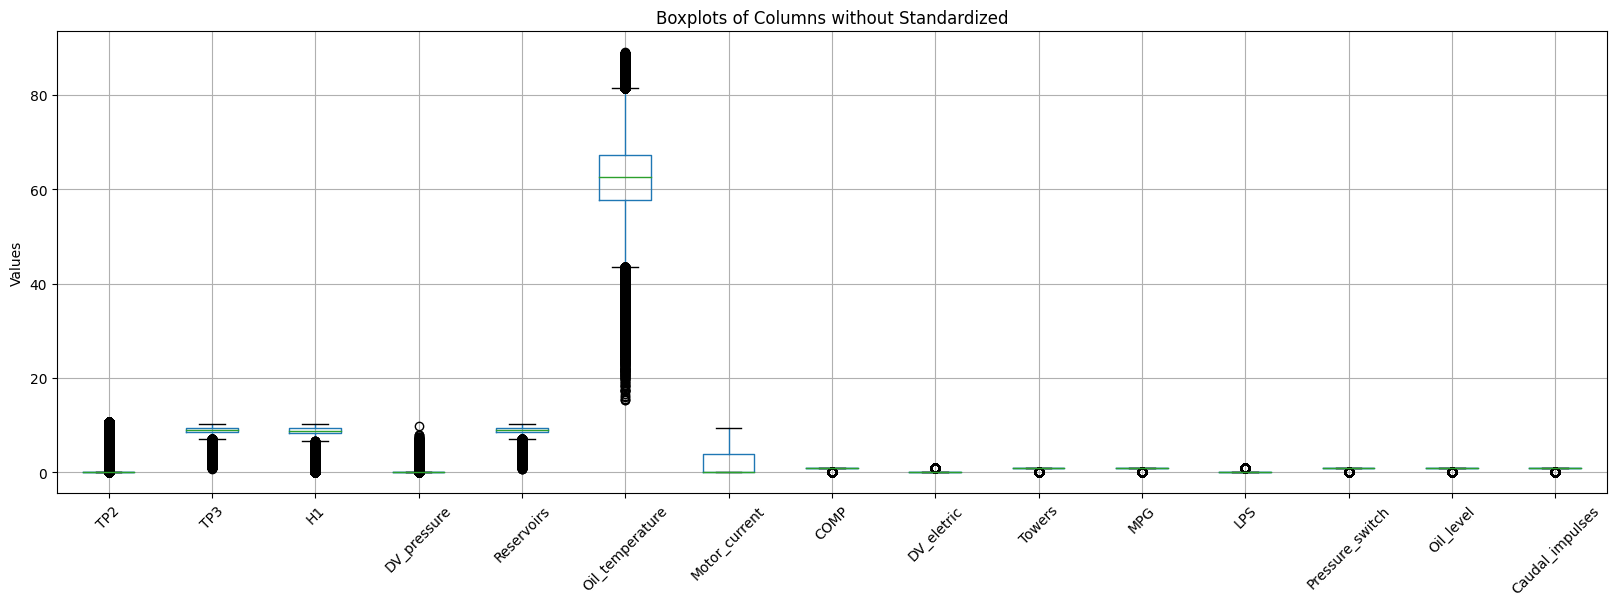

In [109]:

num_df = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current','COMP',	'DV_eletric',	'Towers',	'MPG',	'LPS',	'Pressure_switch',
          'Oil_level',	'Caudal_impulses']

plt.figure(figsize=(20, 6))
df[num_df].boxplot()
plt.title('Boxplots of Columns without Standardized')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

To bring every column to a same scale, we standardize the columns.

<Axes: xlabel='LPS', ylabel='Motor_current'>

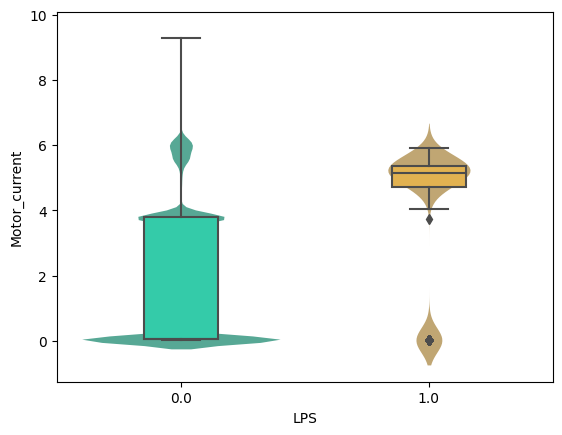

In [56]:
ax = sns.violinplot(data=df, x='LPS', y='Motor_current', palette='turbo',
                    inner=None, linewidth=0, saturation=0.4)
sns.boxplot(x='LPS', y='Motor_current', data=df, palette='turbo', width=0.3,
            boxprops={'zorder': 2}, ax=ax)


In [94]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [103]:
df.head(3)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.424441,0.584247,0.531575,-0.20909,0.583993,-1.387941,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.425056,0.568600,0.529175,-0.20386,0.568326,-1.376431,-0.873208,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.424441,0.552953,0.526175,-0.20386,0.552660,-1.387941,-0.872122,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


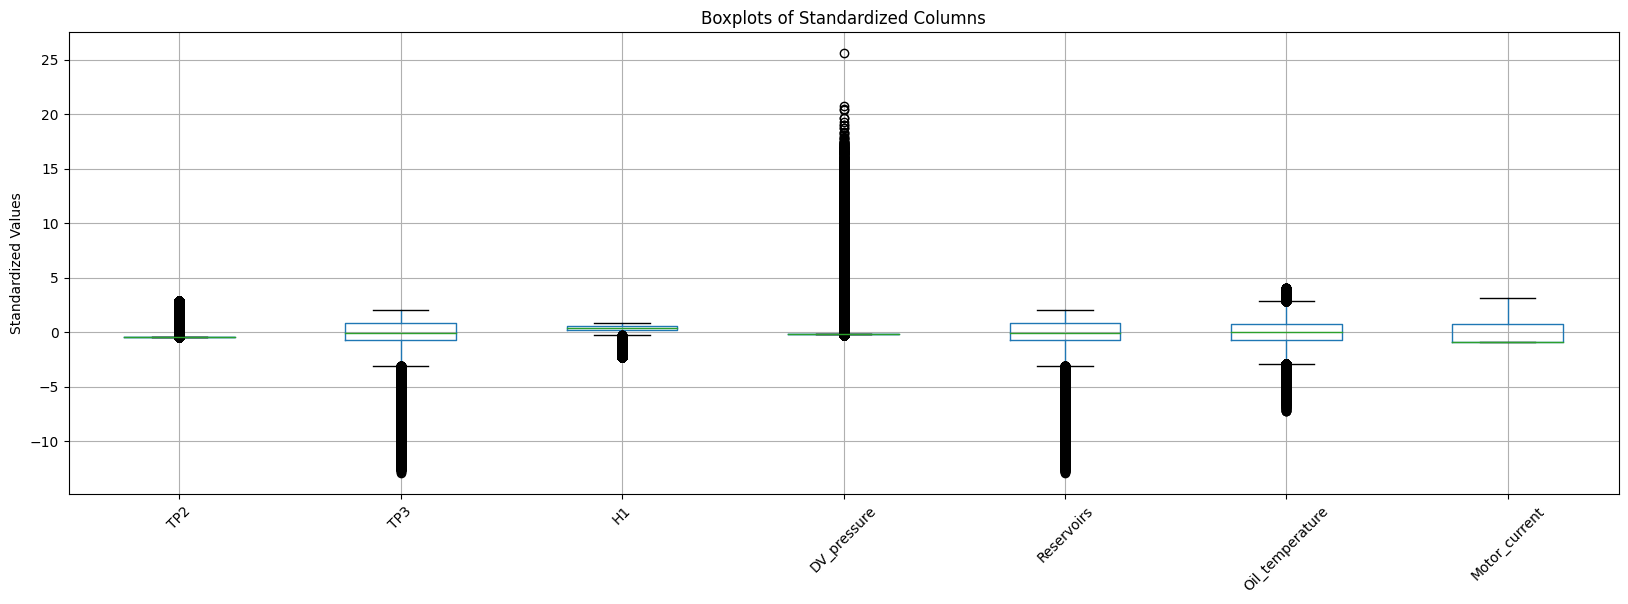

In [99]:

# Plot boxplots for each column
plt.figure(figsize=(20, 6))
df[columns_to_standardize].boxplot()
plt.title('Boxplots of Standardized Columns')
plt.ylabel('Standardized Values')
plt.xticks(rotation=45)
plt.show()